In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('HousePrice.csv')

In [90]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [92]:
x = df.pop('date')
x = df.pop('street')
x = df.pop('city')
x = df.pop('country')
x = df.pop('statezip')
x = df.pop('yr_renovated')
x = df.pop('condition')
x = df.pop('yr_built')

In [93]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,1140,800


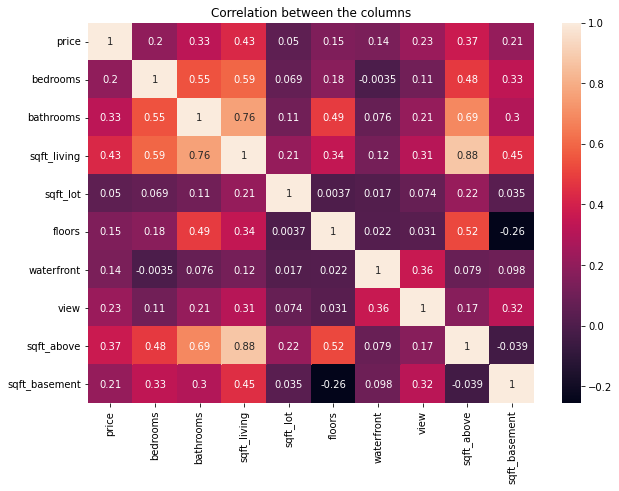

In [94]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [95]:
X = df.drop(['price'], axis=1)
y = df['price']

In [96]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (4600, 9)
Shape of y is:  (4600,)


In [97]:
y = y.values.reshape(-1,1)

In [98]:
y.shape

(4600, 1)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [100]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1380, 9)
X_train shape: (3220, 9)
y_test shape:  (1380, 1)
y_train shape: (3220, 1)


In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
pred = model.predict(X_test)

In [106]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  202630.6729187713
MSE:  681979535389.3029
R2 score:  -7.879549412697315


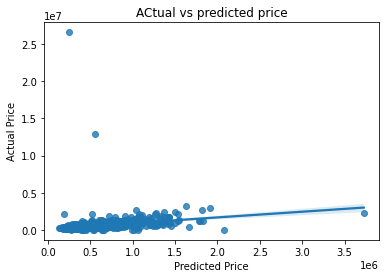

In [108]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()